In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the hospital ratios pickle file
df = pd.read_pickle('../hospital_ratios.pkl')
df.head(50)

FY 2020  \
Hospital                     Ratio                                                         
Bridgton Hospital            Total Margin                                          6.940   
                             Operating Margin                                      4.040   
                             Non Operating Revenue                                43.490   
                             Return on Equity                                      8.050   
                             Current Ratio without Board Designated & Undesi...    3.106   
                             Days in Accounts Receivable days                     41.500   
                             Days Cash on Hand, Current days                     266.600   
                             Days Cashon Hand, InclBoard Designated &Undesig...  318.700   
                             Average Pay Period, Current Liabilities days        104.600   
                             Equity Financing Ratio                               68.800   
                             Fixed Asset Financing                                40.890   
                             Cash Flow Divided by Total Debt                      28.810   
                             Debt Service Coverage rate                            8.056   
                             Total Asset Turnover rate                             0.798   
                             Fixed Asset Turnover rate                             3.336   
                             Average Age of Plant Depreciation Only years         13.700   
Calais Regional Hospital     Total Margin                                         13.610   
                             Operating Margin                                     13.480   
                             Non Operating Revenue                                 1.130   
                             Return on Equity (                                   97.430   
                             Current Ratio without Board Designated & Undesi...    2.097   
                             Days in Accounts Receivable days                     22.700   
                             Days Cash on Hand, Current days                      28.500   
                             Days Cashon Hand, InclBoard Designated &Undesig...   32.900   
                             Average Pay Period, Current Liabilities days         51.100   
                             Equity Financing Ratio (                             21.510   
                             Fixed Asset Financing                                 0.000   
                             Cash Flow Divided by Total Debt                      20.870   
                             Debt Service Coverage rate (cid:                    132.000   
                             Total Asset Turnover rate                             1.539   
                             Fixed Asset Turnover rate                             2.868   
                             Average Age of Plant Depreciation Only years         23.800   
Cary Medical Center          Total Margin                                          1.410   
                             Operating Margin                                      1.310   
                             Non Operating Revenue                                 7.250   
                             Return on Equity                                      3.810   
                             Current Ratio without Board Designated & Undesi...    1.463   
                             Days in Accounts Receivable days                     61.300   
                             Days Cash on Hand, Current days                     126.700   
                             Days Cashon Hand, InclBoard Designated &Undesig...  154.600   
                             Average Pay Period, Current Liabilities days        151.100   
                             Equity Financing Ratio                               48.030   
                             Fixe

In [46]:
def plot_ratio_histogram(ax, df, ratio, year1, year2, bins=15):
    """
    Create a histogram across hospitals for a specific ratio and year.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing hospital ratios data with columns: Hospital, Ratio, and year columns
    ratio : str
        The name of the ratio to plot (e.g., 'Total Margin', 'Operating Margin')
    year : str or int
        The fiscal year to analyze. Can be 'FY 2024', '2024', or 2024
    bins : int, optional (default=15)
        Number of bins for the histogram
    figsize : tuple, optional (default=(12, 6))
        Figure size (width, height) in inches
    
    Returns:
    --------
    None
        Displays the histogram with statistics
    
    Example:
    --------
    plot_ratio_histogram(df, 'Total Margin', 'FY 2024')
    plot_ratio_histogram(df, 'Operating Margin', 2023, bins=20)
    """
    
    # Normalize year input
    if isinstance(year1, int):
        year_col = f'FY {year1}'
    elif isinstance(year1, str):
        if year1.startswith('FY '):
            year_col = year1
        else:
            year_col = f'FY {year1}'
    else:
        raise ValueError(f"Invalid year format: {year1}. Use 'FY 2024', '2024', or 2024")
    
    # Check if year column exists
    if year_col not in df.columns:
        available_years = [col for col in df.columns if col.startswith('FY ')]
        raise ValueError(f"Year '{year_col}' not found. Available years: {available_years}")
    
    # Filter data for the specified ratio
    ratio_data = df.xs(ratio, level='Ratio')
    
    if ratio_data.empty:
        available_ratios = sorted(df['Ratio'].unique())
        raise ValueError(f"Ratio '{ratio}' not found. Available ratios:\n" + "\n".join(available_ratios))
    
    # Extract values for the specified year
    values = pd.to_numeric(ratio_data[year_col], errors='coerce')
    values2 = pd.to_numeric(ratio_data[year2], errors='coerce')
    
    # Remove NaN values
    values_clean = values.dropna()
    values2_clean = values2.dropna()
    
    if len(values_clean) == 0:
        print(f"No valid data available for {ratio} in {year_col}")
        return
    
    # Calculate statistics
    mean_val = values_clean.mean()
    median_val = values_clean.median()
    std_val = values_clean.std()
    min_val = values_clean.min()
    max_val = values_clean.max()
    n_hospitals = len(values_clean)
    n_missing = len(values) - len(values_clean)
    
    # Plot histogram
    n, bins_edges, patches = ax.hist(values_clean, bins=bins, 
                                       alpha=0.5, color='blue', linewidth=1.2)
    
    n, bins_edges, patches = ax.hist(values2_clean, bins=bins, 
                                       alpha=0.5, color='red', linewidth=1.2)
    
    # Add mean and median lines
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
               label=f'Mean: {mean_val:.2f}', alpha=0.8)
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, 
               label=f'Median: {median_val:.2f}', alpha=0.8)
    
    # Labels and title
    ax.set_xlabel(f'{ratio}')
    ax.set_ylabel('Number of Hospitals')
    ax.set_title(f'{ratio} Across Maine Hospitals\n{year_col}')
    
    # Add legend
    ax.legend(loc='upper right')
    
    # Add grid for readability
    # ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add statistics text box
    stats_text = f'Statistics:\n'
    stats_text += f'N = {n_hospitals} hospitals\n'
    if n_missing > 0:
        stats_text += f'Missing = {n_missing}\n'
    stats_text += f'Mean = {mean_val:.2f}\n'
    stats_text += f'Median = {median_val:.2f}\n'
    stats_text += f'Std Dev = {std_val:.2f}\n'
    stats_text += f'Min = {min_val:.2f}\n'
    stats_text += f'Max = {max_val:.2f}'
    
    # Position text box
    # ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
    #         fontsize=9, verticalalignment='top',
    #         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    return ax

In [47]:
# Example usage:
plot_ratio_histogram(df, 'Total Margin', 'FY 2024', 'FY 2019')

TypeError: plot_ratio_histogram() missing 1 required positional argument: 'year2'

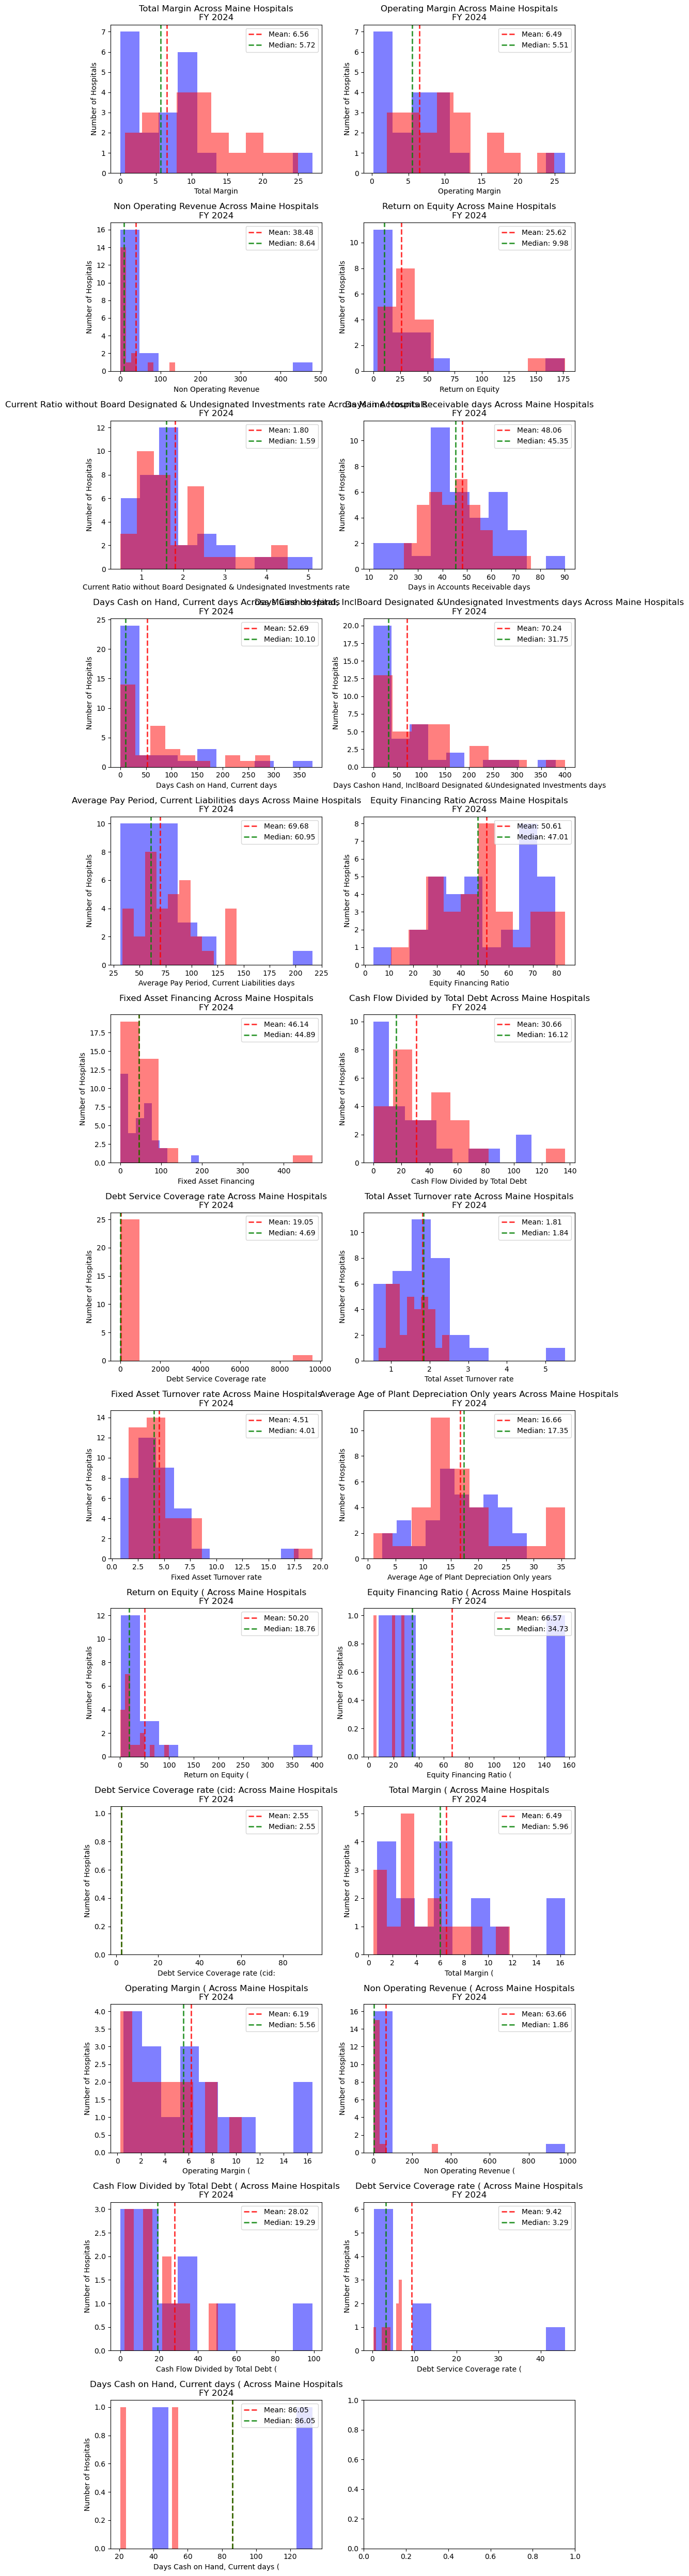

In [49]:
all_ratios = df.index.get_level_values('Ratio').unique()

fig, ax = plt.subplots(int(len(all_ratios) / 2) + 1, 2, figsize=(10, 4 * len(all_ratios) / 2))
ax = ax.flatten()

for i, ratio in enumerate(all_ratios):
    plot = plot_ratio_histogram(ax[i], df, ratio, 'FY 2024', 'FY 2021', bins=10)

plt.tight_layout()
plt.show()

In [60]:
def plot_ratio_scatter(ax, df, ratio, year1, year2):
    ratio_data = df.xs(ratio, level='Ratio')
    ax.scatter(ratio_data[year1], ratio_data[year2])

    ax.set_title(f'{ratio} Scatter Plot: {year1} vs {year2}')
    ax.set_xlabel(f'{year1}')
    ax.set_ylabel(f'{year2}')
    ax.set_aspect('equal', adjustable='datalim')

    return ax

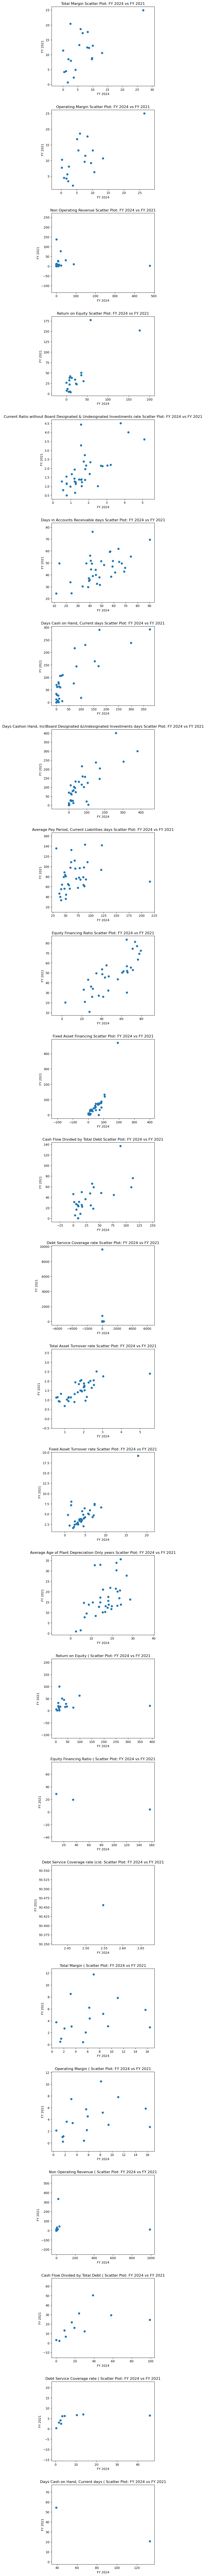

<Figure size 640x480 with 0 Axes>

In [61]:
fig, ax = plt.subplots(len(all_ratios), 1, figsize=(6, 6 * len(all_ratios)))
plt.subplots_adjust(hspace=0.3)

ax = ax.flatten()
for i, ratio in enumerate(all_ratios):
    plot = plot_ratio_scatter(ax[i], df, ratio, 'FY 2024', 'FY 2021')

plt.show()
plt.tight_layout()